<a href="https://colab.research.google.com/github/jasmehla/population-analysis-colab/blob/main/Task_1_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1(

In [2]:
from google.colab import files
uploaded = files.upload()

Saving API_SP.POP.TOTL_DS2_en_csv_v2_127006.zip to API_SP.POP.TOTL_DS2_en_csv_v2_127006.zip


In [3]:
import zipfile
import os

with zipfile.ZipFile("API_SP.POP.TOTL_DS2_en_csv_v2_127006.zip", "r") as zip_ref:
    zip_ref.extractall("data")

# List extracted files
os.listdir("data")

['Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_127006.csv',
 'API_SP.POP.TOTL_DS2_en_csv_v2_127006.csv',
 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_127006.csv']

In [4]:
df = pd.read_csv("data/API_SP.POP.TOTL_DS2_en_csv_v2_127006.csv", skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


In [5]:
india = df[df['Country Name'] == 'India']
india = india.loc[:, '1960':'2022'].T
india.columns = ['Population']
india = india.reset_index().rename(columns={'index': 'Year'})
india['Year'] = india['Year'].astype(int)
india['Population'] = india['Population'] / 1e6  # Convert to millions

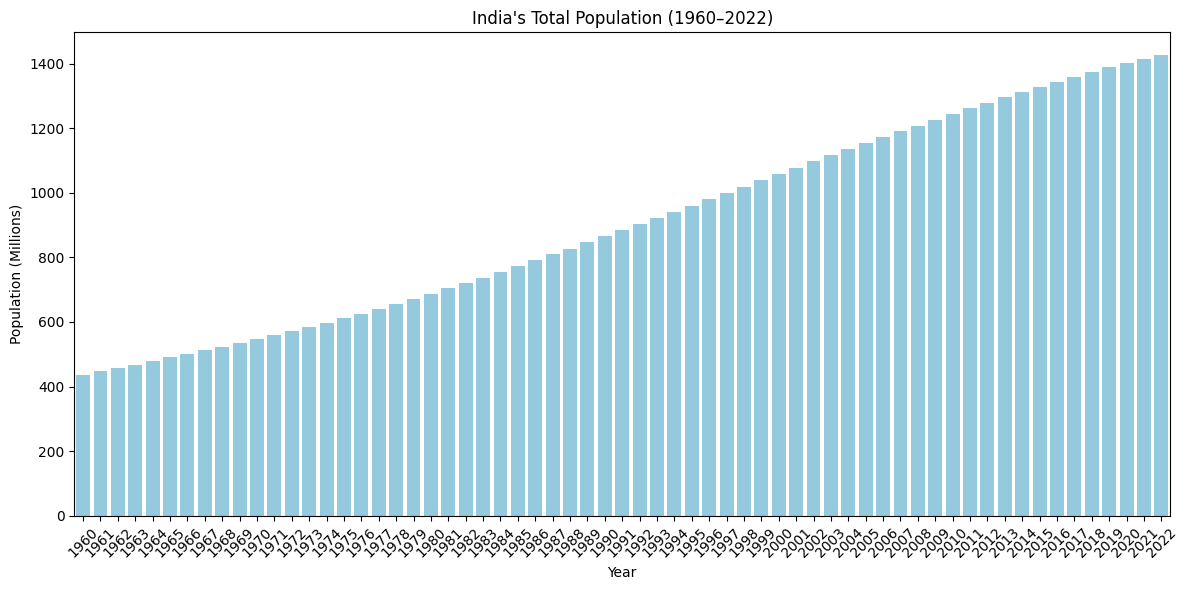

In [6]:
# Plot India's population over time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=india, x='Year', y='Population', color='skyblue')
plt.title("India's Total Population (1960–2022)")
plt.ylabel("Population (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-7-138547075.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_groups, y=population, palette='pastel')


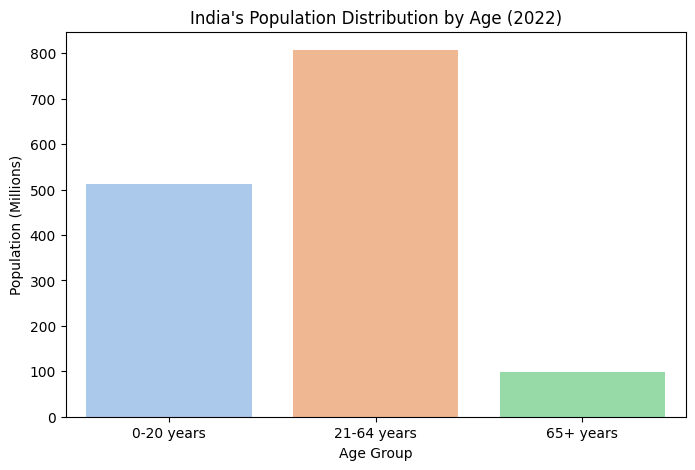

In [7]:
# Plot age group distribution from image (manual)
age_groups = ['0-20 years', '21-64 years', '65+ years']
population = [512, 807, 98]

plt.figure(figsize=(8, 5))
sns.barplot(x=age_groups, y=population, palette='pastel')
plt.title("India's Population Distribution by Age (2022)")
plt.ylabel("Population (Millions)")
plt.xlabel("Age Group")
plt.show()
